In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.preprocessing import MultiLabelBinarizer
from sklearn.multiclass import OneVsRestClassifier
from sklearn.linear_model import LogisticRegression

# 기본 데이터 확인

In [6]:
df_2021 = pd.read_csv("./data/tmdb_2021.csv")
df_2021.head()

,title,release_date,type,runtime,season_count,episode_count,genre,director,cast,country,language,production_company,synopsis,tags,imdb_rating,imdb_review_count
0,The Tomorrow War,2021-09-03,movie,138.0,NaN,NaN,"Action, Science Fiction, Adventure",Chris McKay,"Chris Pratt, Yvonne Strahovski, J.K. Simmons, ...",US,en,"Skydance Media, Phantom Four, Lit Entertainmen...",The world is stunned when a group of time trav...,"world cup, time travel, global warming, glacie...",7.500,3712
1,Spider-Man: No Way Home,2021-12-15,movie,148.0,NaN,NaN,"Action, Adventure, Science Fiction",Jon Watts,"Tom Holland, Zendaya, Benedict Cumberbatch, Ja...",US,en,"Marvel Studios, Pascal Pictures, Columbia Pict...",Peter Parker is unmasked and no longer able to...,"new york city, hero, showdown, magic, loss of ...",7.945,20819
2,Dune,2021-09-15,movie,155.0,NaN,NaN,"Science Fiction, Adventure",Denis Villeneuve,"Timothée Chalamet, Rebecca Ferguson, Oscar Isa...",US,en,Legendary Pictures,"Paul Atreides, a brilliant and gifted young ma...","empire, future, epic, army, based on novel or ...",7.781,13620
3,Pleasure,2021-10-08,movie,108.0,NaN,NaN,Drama,Ninja Thyberg,"Sofia Kappel, Zelda Morrison, Tee Reel, Evelyn...",SE,sv,"Film i Väst, Flamboyance Films, Lemming Film, ...",19 year old Linnéa leaves her small town in Sw...,"pornography, female friendship, porn star, fem...",6.300,663
4,Girl in the Basement,2021-02-27,movie,88.0,NaN,NaN,"Thriller, Crime, TV Movie",Elisabeth Röhm,"Judd Nelson, Stefanie Scott, Joely Fisher, Bra...",US,en,"Big Dreams Entertainment, Swirl Films",Sara is a teen girl who is looking forward to ...,"imprisonment, based on true story, basement, c...",7.622,756


In [7]:
df_2021.sort_values(by='title', ascending=True).head(10)

,title,release_date,type,runtime,season_count,episode_count,genre,director,cast,country,language,production_company,synopsis,tags,imdb_rating,imdb_review_count
8077,"""Bark""",2021-04-25,movie,4.0,NaN,NaN,Drama,Lukas Blumann,Julian Fritz,DE,de,Blackgate Media,"""Julian runs away from his Problems and hides ...","hip-hop, muay thai, monochrome",4.0,2
11368,"""Deji"" Meets Girl",2021-10-02,tv,2.0,1.0,12.0,"Animation, Sci-Fi & Fantasy",NaN,"Tatsuyuki Kobayashi, Kiyono Yasuno, Kenta Miya...",JP,ja,LIDENFILMS,Sixteen-year-old Maise Higa spends her summer ...,NaN,6.5,8
13442,"""Manga Man"" Falling From The Sky",2021-11-25,tv,NaN,1.0,20.0,"Comedy, Sci-Fi & Fantasy",NaN,"Chen Jiawen, Huang Enyu, Jeremy Wang",CN,zh,NaN,The comic author Mao Douzi modified his comics...,NaN,0.0,0
17778,"""TO BE A WOMAN"" SHORT FILM SHOWCASE",2021-03-28,tv,NaN,1.0,10.0,Drama,NaN,NaN,NaN,zh,NaN,In commemoration of the 80th anniversary of Vi...,NaN,9.0,1
5740,#007,2021-01-01,movie,3.0,NaN,NaN,NaN,"Ariadna Onofri, Yonay Boix",NaN,US,en,NaN,Super-8mm film by Yonay Boix & Ariadna Onofri.,NaN,6.0,1
16135,#1 Chicken,2021-09-22,tv,NaN,1.0,6.0,NaN,NaN,Brian Awadis,US,en,NaN,"Join me, FaZe Rug, as I host eight of YouTube’...",NaN,3.0,1
368,#Bro,2021-11-26,movie,140.0,NaN,NaN,"Family, Romance",Karthik Thupurani,"Naveen Chandra, Avika Gor, Sai Ronak, Sanjana ...",IN,te,JJR entertainments,Madhav is sent away from home to earn for his ...,NaN,6.0,1
11877,#ColdGame,2021-06-05,tv,55.0,1.0,8.0,"Drama, Family, Sci-Fi & Fantasy",Yukitoshi Chiba,"Yasuhide Aiki, Shunsuke Nakamura, Rinka Kumada...",JP,ja,NaN,The Earth has descended into a new ice age of ...,NaN,0.0,0
12435,#HATETAG,2021-05-29,tv,NaN,1.0,10.0,NaN,NaN,NaN,TH,th,NaN,10 short films about social media and bullying.,NaN,0.0,0
167,#Home,2021-08-19,movie,162.0,NaN,NaN,"Drama, Family",Rojin Thomas,"Indrans, Sreenath Bhasi, Naslen, Manju Pillai,...",IN,ml,Friday Film House,"The humble, technology-challenged Oliver Twist...",NaN,7.7,31


In [8]:
df_2021.isnull().sum()

title                     1
release_date              0
type                      0
runtime                5620
season_count          10000
episode_count         10000
genre                  3142
director               7832
cast                   3826
country                1068
language                  0
production_company     8345
synopsis               4758
tags                  15648
imdb_rating               0
imdb_review_count         0
dtype: int64

# 2. 전처리 전처리_type

In [9]:
df_2021[df_2021['season_count'].isna() & df_2021['episode_count'].isna()].head(5)

,title,release_date,type,runtime,season_count,episode_count,genre,director,cast,country,language,production_company,synopsis,tags,imdb_rating,imdb_review_count
0,The Tomorrow War,2021-09-03,movie,138.0,NaN,NaN,"Action, Science Fiction, Adventure",Chris McKay,"Chris Pratt, Yvonne Strahovski, J.K. Simmons, ...",US,en,"Skydance Media, Phantom Four, Lit Entertainmen...",The world is stunned when a group of time trav...,"world cup, time travel, global warming, glacie...",7.500,3712
1,Spider-Man: No Way Home,2021-12-15,movie,148.0,NaN,NaN,"Action, Adventure, Science Fiction",Jon Watts,"Tom Holland, Zendaya, Benedict Cumberbatch, Ja...",US,en,"Marvel Studios, Pascal Pictures, Columbia Pict...",Peter Parker is unmasked and no longer able to...,"new york city, hero, showdown, magic, loss of ...",7.945,20819
2,Dune,2021-09-15,movie,155.0,NaN,NaN,"Science Fiction, Adventure",Denis Villeneuve,"Timothée Chalamet, Rebecca Ferguson, Oscar Isa...",US,en,Legendary Pictures,"Paul Atreides, a brilliant and gifted young ma...","empire, future, epic, army, based on novel or ...",7.781,13620
3,Pleasure,2021-10-08,movie,108.0,NaN,NaN,Drama,Ninja Thyberg,"Sofia Kappel, Zelda Morrison, Tee Reel, Evelyn...",SE,sv,"Film i Väst, Flamboyance Films, Lemming Film, ...",19 year old Linnéa leaves her small town in Sw...,"pornography, female friendship, porn star, fem...",6.300,663
4,Girl in the Basement,2021-02-27,movie,88.0,NaN,NaN,"Thriller, Crime, TV Movie",Elisabeth Röhm,"Judd Nelson, Stefanie Scott, Joely Fisher, Bra...",US,en,"Big Dreams Entertainment, Swirl Films",Sara is a teen girl who is looking forward to ...,"imprisonment, based on true story, basement, c...",7.622,756


In [10]:
df_2021[df_2021['season_count'].isna() & df_2021['episode_count'].isna()].shape

(10000, 16)

In [11]:
df_2021['type'].value_counts(dropna=False)

type
movie    10000
tv       10000
Name: count, dtype: int64

In [14]:
print(df_2021[df_2021['type'] == 'movie']['season_count'].value_counts(dropna=False))
print(df_2021[df_2021['type'] == 'movie']['episode_count'].value_counts(dropna=False))

season_count
NaN    10000
Name: count, dtype: int64
episode_count
NaN    10000
Name: count, dtype: int64


In [16]:
print(df_2021[df_2021['type'] == 'tv']['season_count'].value_counts(dropna=False))

season_count
1.0     7777
2.0     1232
3.0      497
4.0      268
5.0      130
6.0       30
8.0       19
7.0       17
9.0        8
10.0       6
12.0       4
14.0       3
16.0       2
15.0       2
48.0       1
54.0       1
19.0       1
13.0       1
22.0       1
Name: count, dtype: int64


In [18]:
print(df_2021[df_2021['type'] == 'tv']['episode_count'].value_counts(dropna=False))

episode_count
1.0      1301
6.0       845
8.0       700
4.0       659
10.0      639
         ... 
121.0       1
382.0       1
77.0        1
186.0       1
248.0       1
Name: count, Length: 221, dtype: int64


In [19]:
df_2021_1 = df_2021

In [20]:
# movie인 경우 season/episode count가 NaN이면 1로 채움
df_2021_1.loc[df_2021_1['type'] == 'movie', ['season_count', 'episode_count']] = df_2021_1.loc[df_2021_1['type'] == 'movie', ['season_count', 'episode_count']].fillna(1)
pd.set_option('display.max_columns', None)
df_2021_1.head()

,title,release_date,type,runtime,season_count,episode_count,genre,director,cast,country,language,production_company,synopsis,tags,imdb_rating,imdb_review_count
0,The Tomorrow War,2021-09-03,movie,138.0,1.0,1.0,"Action, Science Fiction, Adventure",Chris McKay,"Chris Pratt, Yvonne Strahovski, J.K. Simmons, ...",US,en,"Skydance Media, Phantom Four, Lit Entertainmen...",The world is stunned when a group of time trav...,"world cup, time travel, global warming, glacie...",7.500,3712
1,Spider-Man: No Way Home,2021-12-15,movie,148.0,1.0,1.0,"Action, Adventure, Science Fiction",Jon Watts,"Tom Holland, Zendaya, Benedict Cumberbatch, Ja...",US,en,"Marvel Studios, Pascal Pictures, Columbia Pict...",Peter Parker is unmasked and no longer able to...,"new york city, hero, showdown, magic, loss of ...",7.945,20819
2,Dune,2021-09-15,movie,155.0,1.0,1.0,"Science Fiction, Adventure",Denis Villeneuve,"Timothée Chalamet, Rebecca Ferguson, Oscar Isa...",US,en,Legendary Pictures,"Paul Atreides, a brilliant and gifted young ma...","empire, future, epic, army, based on novel or ...",7.781,13620
3,Pleasure,2021-10-08,movie,108.0,1.0,1.0,Drama,Ninja Thyberg,"Sofia Kappel, Zelda Morrison, Tee Reel, Evelyn...",SE,sv,"Film i Väst, Flamboyance Films, Lemming Film, ...",19 year old Linnéa leaves her small town in Sw...,"pornography, female friendship, porn star, fem...",6.300,663
4,Girl in the Basement,2021-02-27,movie,88.0,1.0,1.0,"Thriller, Crime, TV Movie",Elisabeth Röhm,"Judd Nelson, Stefanie Scott, Joely Fisher, Bra...",US,en,"Big Dreams Entertainment, Swirl Films",Sara is a teen girl who is looking forward to ...,"imprisonment, based on true story, basement, c...",7.622,756


In [21]:
df_2021[(df_2021['type'] == 'tv') & (df_2021['season_count'].isna() | df_2021['episode_count'].isna())]
#df_2020[(df_2020['type'] == 'movie') & (df_2020['season_count'].isna() | df_2020['episode_count'].isna())]

,title,release_date,type,runtime,season_count,episode_count,genre,director,cast,country,language,production_company,synopsis,tags,imdb_rating,imdb_review_count


In [22]:
print(df_2021_1[df_2021_1['season_count'] == 1.0]['episode_count'].value_counts(dropna=False))

episode_count
1.0      11259
6.0        815
8.0        650
4.0        633
10.0       586
         ...  
161.0        1
143.0        1
67.0         1
255.0        1
56.0         1
Name: count, Length: 151, dtype: int64


In [23]:
print(df_2021_1[df_2021_1['episode_count'] == 1.0]['season_count'].value_counts(dropna=False))

season_count
1.0     11259
2.0        18
3.0        11
4.0        10
5.0         1
7.0         1
14.0        1
Name: count, dtype: int64


In [24]:
df_2021_2 = df_2021_1
df_2021_2.loc[df_2021_2['type'] == 'tv', ['season_count', 'episode_count']] = df_2021_2.loc[df_2021_1['type'] == 'tv', ['season_count', 'episode_count']].fillna(1)
pd.set_option('display.max_columns', None)
df_2021_2.head()

,title,release_date,type,runtime,season_count,episode_count,genre,director,cast,country,language,production_company,synopsis,tags,imdb_rating,imdb_review_count
0,The Tomorrow War,2021-09-03,movie,138.0,1.0,1.0,"Action, Science Fiction, Adventure",Chris McKay,"Chris Pratt, Yvonne Strahovski, J.K. Simmons, ...",US,en,"Skydance Media, Phantom Four, Lit Entertainmen...",The world is stunned when a group of time trav...,"world cup, time travel, global warming, glacie...",7.500,3712
1,Spider-Man: No Way Home,2021-12-15,movie,148.0,1.0,1.0,"Action, Adventure, Science Fiction",Jon Watts,"Tom Holland, Zendaya, Benedict Cumberbatch, Ja...",US,en,"Marvel Studios, Pascal Pictures, Columbia Pict...",Peter Parker is unmasked and no longer able to...,"new york city, hero, showdown, magic, loss of ...",7.945,20819
2,Dune,2021-09-15,movie,155.0,1.0,1.0,"Science Fiction, Adventure",Denis Villeneuve,"Timothée Chalamet, Rebecca Ferguson, Oscar Isa...",US,en,Legendary Pictures,"Paul Atreides, a brilliant and gifted young ma...","empire, future, epic, army, based on novel or ...",7.781,13620
3,Pleasure,2021-10-08,movie,108.0,1.0,1.0,Drama,Ninja Thyberg,"Sofia Kappel, Zelda Morrison, Tee Reel, Evelyn...",SE,sv,"Film i Väst, Flamboyance Films, Lemming Film, ...",19 year old Linnéa leaves her small town in Sw...,"pornography, female friendship, porn star, fem...",6.300,663
4,Girl in the Basement,2021-02-27,movie,88.0,1.0,1.0,"Thriller, Crime, TV Movie",Elisabeth Röhm,"Judd Nelson, Stefanie Scott, Joely Fisher, Bra...",US,en,"Big Dreams Entertainment, Swirl Films",Sara is a teen girl who is looking forward to ...,"imprisonment, based on true story, basement, c...",7.622,756


# 2. 데이터 전처리_runtime

In [25]:
df_2021_2.isnull().sum()

title                     1
release_date              0
type                      0
runtime                5620
season_count              0
episode_count             0
genre                  3142
director               7832
cast                   3826
country                1068
language                  0
production_company     8345
synopsis               4758
tags                  15648
imdb_rating               0
imdb_review_count         0
dtype: int64

In [26]:
df_2021_2.shape

(20000, 16)

In [28]:
df_2021_2[df_2021_2['runtime'].isna() & df_2021_2['genre'].isna() ].shape

(1971, 16)

## 2_2 runtime null 값 열 제거

In [29]:
df_2021_3 = df_2021_2

In [30]:
df_2021_3.dropna(subset=['runtime'], inplace=True)

In [31]:
df_2021_3.shape

(14380, 16)

# 2. 데이터 전처리_pr

In [32]:
df_2021_4 = df_2021_3
df_2021_4

,title,release_date,type,runtime,season_count,episode_count,genre,director,cast,country,language,production_company,synopsis,tags,imdb_rating,imdb_review_count
0,The Tomorrow War,2021-09-03,movie,138.0,1.0,1.0,"Action, Science Fiction, Adventure",Chris McKay,"Chris Pratt, Yvonne Strahovski, J.K. Simmons, ...",US,en,"Skydance Media, Phantom Four, Lit Entertainmen...",The world is stunned when a group of time trav...,"world cup, time travel, global warming, glacie...",7.500,3712
1,Spider-Man: No Way Home,2021-12-15,movie,148.0,1.0,1.0,"Action, Adventure, Science Fiction",Jon Watts,"Tom Holland, Zendaya, Benedict Cumberbatch, Ja...",US,en,"Marvel Studios, Pascal Pictures, Columbia Pict...",Peter Parker is unmasked and no longer able to...,"new york city, hero, showdown, magic, loss of ...",7.945,20819
2,Dune,2021-09-15,movie,155.0,1.0,1.0,"Science Fiction, Adventure",Denis Villeneuve,"Timothée Chalamet, Rebecca Ferguson, Oscar Isa...",US,en,Legendary Pictures,"Paul Atreides, a brilliant and gifted young ma...","empire, future, epic, army, based on novel or ...",7.781,13620
3,Pleasure,2021-10-08,movie,108.0,1.0,1.0,Drama,Ninja Thyberg,"Sofia Kappel, Zelda Morrison, Tee Reel, Evelyn...",SE,sv,"Film i Väst, Flamboyance Films, Lemming Film, ...",19 year old Linnéa leaves her small town in Sw...,"pornography, female friendship, porn star, fem...",6.300,663
4,Girl in the Basement,2021-02-27,movie,88.0,1.0,1.0,"Thriller, Crime, TV Movie",Elisabeth Röhm,"Judd Nelson, Stefanie Scott, Joely Fisher, Bra...",US,en,"Big Dreams Entertainment, Swirl Films",Sara is a teen girl who is looking forward to ...,"imprisonment, based on true story, basement, c...",7.622,756
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19975,Hold on ! Middle-aged Man,2021-08-12,tv,35.0,1.0,1.0,Reality,NaN,NaN,CN,zh,NaN,NaN,NaN,0.000,0
19984,Kill Thy Neighbour,2021-08-16,tv,45.0,1.0,6.0,Documentary,NaN,NaN,GB,en,FirstLook TV,British true crime documentary series examinin...,NaN,0.000,0
19986,3 Familien - 3 Chancen,2021-09-04,tv,100.0,1.0,6.0,Reality,NaN,NaN,DE,de,NaN,"In each episode, three families receiving soci...",NaN,0.000,0
19994,藏风美少年,2021-05-30,tv,109.0,1.0,13.0,Reality,NaN,NaN,CN,zh,NaN,NaN,NaN,0.000,0


In [33]:
df_2021_4.info()

<class 'pandas.core.frame.DataFrame'>
Index: 14380 entries, 0 to 19998
Data columns (total 16 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   title               14379 non-null  object 
 1   release_date        14380 non-null  object 
 2   type                14380 non-null  object 
 3   runtime             14380 non-null  float64
 4   season_count        14380 non-null  float64
 5   episode_count       14380 non-null  float64
 6   genre               13209 non-null  object 
 7   director            10595 non-null  object 
 8   cast                12862 non-null  object 
 9   country             14072 non-null  object 
 10  language            14380 non-null  object 
 11  production_company  9548 non-null   object 
 12  synopsis            12418 non-null  object 
 13  tags                4098 non-null   object 
 14  imdb_rating         14380 non-null  float64
 15  imdb_review_count   14380 non-null  int64  
dtypes: float6

### tags 관련 기본 문제 해결

1) synopsis, tags, genre가 모두 NaN인 데이터 모두 제거

In [34]:
# 1. 세기: synopsis, genre가 모두 NaN인 행 개수
nan_rows = df_2021_4[['synopsis', 'genre']].isna().all(axis=1)
count_nan_rows = nan_rows.sum()
print(f"synopsis, genre가 모두 NaN인 행 개수: {count_nan_rows}")

synopsis, genre가 모두 NaN인 행 개수: 448


In [35]:
# 2. 삭제: 그런 행 삭제
df_2021_4_cleaned = df_2021_4.loc[~nan_rows].copy()

In [36]:
df_2021_4 = df_2021_4.loc[~nan_rows].copy()
df_2021_4.info()

<class 'pandas.core.frame.DataFrame'>
Index: 13932 entries, 0 to 19994
Data columns (total 16 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   title               13931 non-null  object 
 1   release_date        13932 non-null  object 
 2   type                13932 non-null  object 
 3   runtime             13932 non-null  float64
 4   season_count        13932 non-null  float64
 5   episode_count       13932 non-null  float64
 6   genre               13209 non-null  object 
 7   director            10405 non-null  object 
 8   cast                12547 non-null  object 
 9   country             13736 non-null  object 
 10  language            13932 non-null  object 
 11  production_company  9447 non-null   object 
 12  synopsis            12418 non-null  object 
 13  tags                4097 non-null   object 
 14  imdb_rating         13932 non-null  float64
 15  imdb_review_count   13932 non-null  int64  
dtypes: float6

In [37]:
df_2021_4

,title,release_date,type,runtime,season_count,episode_count,genre,director,cast,country,language,production_company,synopsis,tags,imdb_rating,imdb_review_count
0,The Tomorrow War,2021-09-03,movie,138.0,1.0,1.0,"Action, Science Fiction, Adventure",Chris McKay,"Chris Pratt, Yvonne Strahovski, J.K. Simmons, ...",US,en,"Skydance Media, Phantom Four, Lit Entertainmen...",The world is stunned when a group of time trav...,"world cup, time travel, global warming, glacie...",7.500,3712
1,Spider-Man: No Way Home,2021-12-15,movie,148.0,1.0,1.0,"Action, Adventure, Science Fiction",Jon Watts,"Tom Holland, Zendaya, Benedict Cumberbatch, Ja...",US,en,"Marvel Studios, Pascal Pictures, Columbia Pict...",Peter Parker is unmasked and no longer able to...,"new york city, hero, showdown, magic, loss of ...",7.945,20819
2,Dune,2021-09-15,movie,155.0,1.0,1.0,"Science Fiction, Adventure",Denis Villeneuve,"Timothée Chalamet, Rebecca Ferguson, Oscar Isa...",US,en,Legendary Pictures,"Paul Atreides, a brilliant and gifted young ma...","empire, future, epic, army, based on novel or ...",7.781,13620
3,Pleasure,2021-10-08,movie,108.0,1.0,1.0,Drama,Ninja Thyberg,"Sofia Kappel, Zelda Morrison, Tee Reel, Evelyn...",SE,sv,"Film i Väst, Flamboyance Films, Lemming Film, ...",19 year old Linnéa leaves her small town in Sw...,"pornography, female friendship, porn star, fem...",6.300,663
4,Girl in the Basement,2021-02-27,movie,88.0,1.0,1.0,"Thriller, Crime, TV Movie",Elisabeth Röhm,"Judd Nelson, Stefanie Scott, Joely Fisher, Bra...",US,en,"Big Dreams Entertainment, Swirl Films",Sara is a teen girl who is looking forward to ...,"imprisonment, based on true story, basement, c...",7.622,756
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19959,Tuition Ke Baad,2021-12-28,tv,16.0,1.0,5.0,Comedy,NaN,NaN,IN,hi,NaN,"Aashiq, Tantrik, Sholey, and Jhatarburg study ...",NaN,0.000,0
19975,Hold on ! Middle-aged Man,2021-08-12,tv,35.0,1.0,1.0,Reality,NaN,NaN,CN,zh,NaN,NaN,NaN,0.000,0
19984,Kill Thy Neighbour,2021-08-16,tv,45.0,1.0,6.0,Documentary,NaN,NaN,GB,en,FirstLook TV,British true crime documentary series examinin...,NaN,0.000,0
19986,3 Familien - 3 Chancen,2021-09-04,tv,100.0,1.0,6.0,Reality,NaN,NaN,DE,de,NaN,"In each episode, three families receiving soci...",NaN,0.000,0


## director와 cast가 모두 nan인 행 제거

In [38]:
nan_both = df_2021_4[(df_2021_4['director'].isna()) & (df_2021_4['cast'].isna())]
print(f"director와 cast 둘 다 NaN인 행 개수: {len(nan_both)}")

director와 cast 둘 다 NaN인 행 개수: 852


In [39]:
df_2021_4 = df_2021_4.dropna(subset=['director', 'cast'], how='all')

In [40]:
df_2021_4.info()

<class 'pandas.core.frame.DataFrame'>
Index: 13080 entries, 0 to 19944
Data columns (total 16 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   title               13079 non-null  object 
 1   release_date        13080 non-null  object 
 2   type                13080 non-null  object 
 3   runtime             13080 non-null  float64
 4   season_count        13080 non-null  float64
 5   episode_count       13080 non-null  float64
 6   genre               12433 non-null  object 
 7   director            10405 non-null  object 
 8   cast                12547 non-null  object 
 9   country             12959 non-null  object 
 10  language            13080 non-null  object 
 11  production_company  9071 non-null   object 
 12  synopsis            11893 non-null  object 
 13  tags                4089 non-null   object 
 14  imdb_rating         13080 non-null  float64
 15  imdb_review_count   13080 non-null  int64  
dtypes: float6

# tag npl처리

In [41]:
# 1. tags 결측치는 빈 문자열로 대체
df_2021_4['tags'] = df_2021_4['tags'].fillna('')

# 2. synopsis, genre 결측치 처리 후 text_input 생성
df_2021_4['synopsis'] = df_2021_4['synopsis'].fillna('')
df_2021_4['genre'] = df_2021_4['genre'].fillna('')
df_2021_4['text_input'] = df_2021_4['synopsis'] + ' ' + df_2021_4['genre']

# 3. tags 기준으로 train / test 나누기
train_df = df_2021_4[df_2021_4['tags'] != ''].copy()
test_df = df_2021_4[df_2021_4['tags'] == ''].copy()

# 4. tags 리스트로 분리
train_df['tags_list'] = train_df['tags'].apply(lambda x: x.split(','))

# 5. 다중 라벨 인코딩
mlb = MultiLabelBinarizer()
y_train = mlb.fit_transform(train_df['tags_list'])

# 6. 텍스트 벡터화 (TF-IDF)
vectorizer = TfidfVectorizer(max_features=5000)
X_train = vectorizer.fit_transform(train_df['text_input'])

# 7. 모델 학습 (LogisticRegression 다중 라벨)
model = OneVsRestClassifier(LogisticRegression(max_iter=1000))
model.fit(X_train, y_train)

# 8. 예측 대상(test_df)이 비어있지 않으면 예측 수행
if not test_df.empty:
    X_test = vectorizer.transform(test_df['text_input'])
    y_prob = model.predict_proba(X_test)

    # 예측 임계값 설정 (낮춰서 태그 생성 늘림)
    threshold = 0.07
    y_pred = (y_prob >= threshold).astype(int)

    predicted_tags = mlb.inverse_transform(y_pred)
    test_df['predicted_tags'] = [', '.join(tags) if tags else np.nan for tags in predicted_tags]

    # 9. 규칙 기반 태그 보완용 키워드 룰 정의
    rules = {
        'romance': ['romance', 'love', 'relationship', 'affair', 'heart', 'kiss', 'wedding',
                    'boyfriend', 'girlfriend', 'breakup', 'dating', 'first love',
                    'valentine', 'romantic', 'jealousy', 'intimacy', 'honeymoon'],
        'action': ['battle', 'war', 'fight', 'soldier', 'gun', 'explosion', 'chase', 'enemy',
                'car chase', 'explosives', 'gunfight', 'hand-to-hand', 'sniper',
                'ambush', 'mercenary', 'adrenaline', 'combat', 'high-octane'],
        'thriller': ['thriller', 'mystery', 'suspense', 'crime', 'killer', 'murder', 'detective',
                    'interrogation', 'conspiracy', 'mind game', 'tension', 'abduction',
                    'dangerous', 'mind-bending', 'ticking clock', 'trap'],
        'comedy': ['comedy', 'funny', 'humor', 'laugh', 'joke', 'parody',
                'sitcom', 'sarcasm', 'one-liner', 'slapstick', 'banter',
                'awkward moment', 'gag', 'prank', 'hilarity'],
        'horror': ['ghost', 'horror', 'zombie', 'demon', 'vampire', 'curse',
                'haunted', 'scream', 'paranormal', 'supernatural', 'bloodcurdling',
                'creepy', 'terrifying', 'evil spirit', 'possessed', 'ritual'],
        'fantasy': ['magic', 'wizard', 'dragon', 'kingdom', 'mythical',
                    'sorcerer', 'enchanted', 'portal', 'spell', 'epic quest',
                    'mystical creature', 'ancient prophecy', 'grimoire'],
        'sci-fi': ['space', 'alien', 'robot', 'future', 'technology', 'sci-fi', 'cyber',
                'cyborg', 'AI uprising', 'time machine', 'spaceship', 'hyperspace',
                'galaxy', 'terraforming', 'futuristic', 'parallel universe', 'bioengineering'],
        'drama': ['family', 'life', 'struggle', 'emotional', 'drama', 'society',
                'inner struggle', 'self-discovery', 'character driven', 'emotional arc',
                'breakdown', 'life lesson', 'interpersonal', 'catharsis'],
        'crime': ['criminal', 'robbery', 'heist', 'mafia', 'gang',
                'heist', 'detective', 'undercover', 'criminal syndicate',
                'drug cartel', 'interrogation room', 'forensics', 'manhunt'],
        'animation': ['animation', 'cartoon', 'drawn', 'animated'],
        'sports': ['sports', 'football', 'basketball', 'coach', 'tournament'],
        'historical': ['king', 'queen', 'dynasty', 'empire', 'history', 'ancient'],
        'adventure': ['journey', 'quest', 'treasure', 'explore', 'island', 'survival'],
        'musical': ['song', 'singing', 'performance', 'dance', 'stage', 'music'],
        'documentary': ['real', 'true story', 'interview', 'archive', 'biography', 'footage'],
        'psychological': ['mind', 'mental', 'insanity', 'delusion', 'subconscious', 'dream'],
        'superhero': ['hero', 'superpower', 'villain', 'save', 'city', 'mask'],
        'noir': ['detective', 'dark', 'cigarette', 'femme fatale', 'shadow', 'monologue'],
        'family': ['parent', 'child', 'home', 'holiday', 'siblings', 'bond'],
        'rom-com': ['love', 'funny', 'awkward', 'date', 'charm', 'happy ending'],
        'military': ['army', 'navy', 'mission', 'rank', 'base', 'operation'],
        'cyberpunk': ['neon', 'hacker', 'corporation', 'dystopia', 'implant', 'surveillance'],
        'post-apocalyptic': ['ruins', 'survivor', 'radiation', 'collapse', 'tribe', 'scavenge'],
        'teen': ['high school', 'prom', 'friendship', 'coming of age', 'crush', 'rebellion'],
        'feel-good': ['inspiring', 'heartwarming', 'uplifting', 'positive', 'hope', 'smile'],
        'dark': ['depressing', 'grim', 'tragic', 'bleak', 'morbid'],
        'female-lead': ['strong woman', 'heroine', 'female protagonist', 'girl power'],
        'twist': ['plot twist', 'unpredictable', 'reveal', 'surprise ending'],
        'based-on-true-story': ['true story', 'biopic', 'real events', 'true events'],
        'underdog': ['struggle', 'rise', 'overcome', 'unlikely hero', 'against all odds'],
        'ensemble': ['many characters', 'multiple leads', 'group dynamic', 'interwoven stories'],
        'nostalgic': ['retro', 'classic', 'throwback', '80s', '90s', 'childhood'],
        'social-issue': ['racism', 'inequality', 'poverty', 'justice', 'activism'],
        'trending-theme': ['AI', 'climate', 'pandemic', 'influencer', 'metaverse'],
        'revenge': ['revenge', 'vengeance', 'payback', 'retaliation', 'score to settle'],
        'detective': ['detective', 'investigation', 'clues', 'case', 'inspector', 'sleuth'],
        'time-travel': ['time travel', 'time loop', 'past and future', 'timeline', 'chronosphere'],
        'courtroom': ['courtroom', 'trial', 'lawyer', 'judge', 'defendant', 'testimony'],
        'survival': ['survival', 'wilderness', 'isolation', 'extreme conditions', 'barely escape'],
        'espionage': ['spy', 'espionage', 'agent', 'undercover', 'intel', 'classified'],
        'campus': ['college', 'campus', 'lecture hall', 'seniors', 'dorm', 'professor'],
        'startup': ['startup', 'entrepreneur', 'founder', 'venture', 'pitching', 'angel investor'],
        'heist': ['heist', 'robbery', 'master plan', 'getaway', 'vault', 'crew'],
        'royalty': ['prince', 'princess', 'royal', 'crown', 'throne', 'palace'],
        'wuxia': ['martial arts', 'swordplay', 'wuxia', 'clan', 'sect', 'inner energy'],
        'idol': ['idol', 'stage', 'fandom', 'trainee', 'debut', 'fan meeting'],
        'political': ['election', 'politics', 'scandal', 'congress', 'corruption', 'regime'],
        'revenge-romance': ['bitter love', 'masked identity', 'burning passion', 'payback with love'],
        'healing-romance': ['gentle romance', 'emotional support', 'quiet relationship', 'warm affection'],
        'coming-of-age': ['self-discovery', 'growing up', 'teenage years', 'puberty',
                        'youth', 'maturity', 'identity', 'high school', 'first time', 'life lessons'],
        'dark-comedy': ['dark humor', 'macabre laugh', 'twisted joke', 'morbidly funny',
                        'ironic death', 'satirical tragedy', 'deadpan', 'black comedy'],
        'dystopian': ['oppressive regime', 'totalitarian', 'no freedom', 'surveillance state',
                    'rebellion', 'social collapse', 'harsh world', 'authoritarian', 'controlled society'],
        'slice-of-life': ['daily routine', 'ordinary moments', 'casual life', 'everyday drama',
                        'subtle emotion', 'mundane beauty', 'life as it is', 'quiet narrative'],
        'found-family': ['bond', 'unrelated family', 'loyal companions', 'chosen family',
                        'support system', 'teamwork', 'squad', 'surrogate parents', 'emotional ties'],
        'road-trip': ['on the road', 'journey across', 'miles', 'car travel', 'hit the road',
                    'cross-country', 'travel companions', 'gas station', 'stopover', 'long drive'],
        'tech-noir': ['grim future', 'tech-savvy criminal', 'neon-lit', 'cyber corruption',
                    'urban decay', 'AI rebellion', 'cyberspace', 'digital heist', 'surveillance overload'],
        'folklore': ['legend', 'traditional tale', 'mythical creature', 'ancient lore',
                    'cultural story', 'spirit', 'oral tradition', 'forest demon', 'village tale']
    }

    def simple_tag_rule(text):
        text = text.lower()
        tags = set()
        for tag, keywords in rules.items():
            if any(word in text for word in keywords):
                tags.add(tag)
        return ', '.join(tags) if tags else np.nan

    # 10. 예측 실패 (nan)인 경우 규칙 기반으로 태그 보완
    no_tag_idx = test_df[test_df['predicted_tags'].isna()].index
    test_df.loc[no_tag_idx, 'predicted_tags'] = test_df.loc[no_tag_idx, 'text_input'].apply(simple_tag_rule)

    # 11. 원본에 태그 삽입
    df_2021_4.loc[test_df.index, 'tags'] = test_df['predicted_tags']

/var/folders/gd/kdlq8js55wdg60tg67427vvc0000gn/T/ipykernel_9854/3519221282.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_2021_4['tags'] = df_2021_4['tags'].fillna('')
/var/folders/gd/kdlq8js55wdg60tg67427vvc0000gn/T/ipykernel_9854/3519221282.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_2021_4['synopsis'] = df_2021_4['synopsis'].fillna('')
/var/folders/gd/kdlq8js55wdg60tg67427vvc0000gn/T/ipykernel_9854/3519221282.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a sli

In [42]:
df_2021_4['tags'].value_counts(dropna=False)

tags
 short film                                                                                                                                                                                     2124
softcore                                                                                                                                                                                         279
 documentary, biography                                                                                                                                                                          195
christmas                                                                                                                                                                                        184
NaN                                                                                                                                                                                              180
          

# country에서 nan은 language와 같은 값으로 처리

In [43]:
df_2021_4.isnull().sum()

title                    1
release_date             0
type                     0
runtime                  0
season_count             0
episode_count            0
genre                    0
director              2675
cast                   533
country                121
language                 0
production_company    4009
synopsis                 0
tags                   180
imdb_rating              0
imdb_review_count        0
text_input               0
dtype: int64

In [44]:
df_2021_4['country'].fillna(df_2021_4['language'], inplace=True)

/var/folders/gd/kdlq8js55wdg60tg67427vvc0000gn/T/ipykernel_9854/1410070409.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_2021_4['country'].fillna(df_2021_4['language'], inplace=True)
/var/folders/gd/kdlq8js55wdg60tg67427vvc0000gn/T/ipykernel_9854/1410070409.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_2021_4['country'].filln

In [45]:
df_2021_4.isnull().sum()

title                    1
release_date             0
type                     0
runtime                  0
season_count             0
episode_count            0
genre                    0
director              2675
cast                   533
country                  0
language                 0
production_company    4009
synopsis                 0
tags                   180
imdb_rating              0
imdb_review_count        0
text_input               0
dtype: int64

In [46]:
df_2021_4['production_company'].value_counts(dropna=False)

production_company
NaN                                                                                4009
TVB                                                                                  28
Viva Films, Vivamax                                                                  27
Estúdios Globo                                                                       19
NHK                                                                                  18
                                                                                   ... 
World Wrestling Entertainment (WWE), A+E Global Media, WWE Studios                    1
GFC Films, New Zealand Film Commission, Images & Sound, Traus Media Investments       1
Lolav Media, Ginestra Film, MTV Documentary Films                                     1
Rooftop Seven                                                                         1
D28 Productions                                                                       1
Name: count, 

# production_company, director, cast _is_comming 처리
- 결측 값이 많아 이렇게 진행
- 정보 부족이지 하나의 회사명, 이름은 x
- 'unknown'만 삽입했을 경우 정상 값이라고 학습하는 것을 방지 => unknown으로 채우되 값은 없음으로 지정하기 위해 사용

In [47]:
unique_count = df_2021_4['production_company'].nunique(dropna=True)
print(unique_count)

7446


In [48]:
df_2021_4['production_company_is_missing'] = df_2021_4['production_company'].isna().astype(int)
df_2021_4['production_company'] = df_2021_4['production_company'].fillna('unknown')

/var/folders/gd/kdlq8js55wdg60tg67427vvc0000gn/T/ipykernel_9854/2810204958.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_2021_4['production_company_is_missing'] = df_2021_4['production_company'].isna().astype(int)
/var/folders/gd/kdlq8js55wdg60tg67427vvc0000gn/T/ipykernel_9854/2810204958.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_2021_4['production_company'] = df_2021_4['production_company'].fillna('unknown')


In [50]:
df_2021_4['cast_is_missing'] = df_2021_4['cast'].isna().astype(int)
df_2021_4['cast'] = df_2021_4['cast'].fillna('unknown')

/var/folders/gd/kdlq8js55wdg60tg67427vvc0000gn/T/ipykernel_9854/942314562.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_2021_4['cast_is_missing'] = df_2021_4['cast'].isna().astype(int)
/var/folders/gd/kdlq8js55wdg60tg67427vvc0000gn/T/ipykernel_9854/942314562.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_2021_4['cast'] = df_2021_4['cast'].fillna('unknown')


In [51]:
df_2021_4['director_is_missing'] = df_2021_4['director'].isna().astype(int)
df_2021_4['director'] = df_2021_4['director'].fillna('unknown')

/var/folders/gd/kdlq8js55wdg60tg67427vvc0000gn/T/ipykernel_9854/1776039999.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_2021_4['director_is_missing'] = df_2021_4['director'].isna().astype(int)
/var/folders/gd/kdlq8js55wdg60tg67427vvc0000gn/T/ipykernel_9854/1776039999.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_2021_4['director'] = df_2021_4['director'].fillna('unknown')


In [52]:
print(df_2021_4.shape)
print(df_2021_4.isnull().sum())

(13080, 20)
title                              1
release_date                       0
type                               0
runtime                            0
season_count                       0
episode_count                      0
genre                              0
director                           0
cast                               0
country                            0
language                           0
production_company                 0
synopsis                           0
tags                             180
imdb_rating                        0
imdb_review_count                  0
text_input                         0
production_company_is_missing      0
cast_is_missing                    0
director_is_missing                0
dtype: int64


In [53]:
nan_tags_rows = df_2021_4[df_2021_4['tags'].isna()]
nan_tags_rows

,title,release_date,type,runtime,season_count,episode_count,genre,director,cast,country,language,production_company,synopsis,tags,imdb_rating,imdb_review_count,text_input,production_company_is_missing,cast_is_missing,director_is_missing
755,Tourist,2021-05-19,movie,99.0,1.0,1.0,Action,Andrey Batov,"Aleksei Shevchenkov, Evgeny Terskikh, Sergey V...",RU,ru,"3xMedia, Aurum Production, Paritet",Story of Russian military advisors in the Cent...,NaN,6.284,37,Story of Russian military advisors in the Cent...,0,0,0
1147,The Diabetes Solution,2021-11-09,movie,53.0,1.0,1.0,Documentary,John Beckham,"Ryan Attar, Richard Bernstein, Ken Berry, A.J....",US,en,Passion River Films,The diabetes community has been filled with de...,NaN,10.000,1,The diabetes community has been filled with de...,0,0,0
1827,Whitney Houston & Bobbi Kristina: Didn't We Al...,2021-02-06,movie,84.0,1.0,1.0,"Documentary, TV Movie",unknown,"Whitney Houston, Bobbi Kristina Brown, Shane J...",US,en,Creature Films,An in-depth look at the parallel lives of reno...,NaN,8.700,3,An in-depth look at the parallel lives of reno...,0,0,1
2334,Swimming Out Till the Sea Turns Blue,2021-05-28,movie,112.0,1.0,1.0,Documentary,Jia Zhangke,"Huifang Duan, Liang Hong, Pingwa Jia, Yu Hua",CN,zh,"Xstream Pictures, Shanxi Film & Television Gro...",Filmmaker Jia Zhangke chronicles his local lit...,NaN,7.000,15,Filmmaker Jia Zhangke chronicles his local lit...,0,0,0
2351,Paper & Glue,2021-11-12,movie,94.0,1.0,1.0,Documentary,JR,"JR, Ladj Ly","US, AU",en,"Imagine Documentaries, Impact Partners, Shark ...",A documentary following JR's artwork giving a ...,NaN,8.400,5,A documentary following JR's artwork giving a ...,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17905,Jour de play,2021-03-24,tv,40.0,4.0,13.0,"Talk, Documentary",unknown,Dorian Chandelier,FR,fr,ARTE,,NaN,0.000,0,"Talk, Documentary",0,0,1
17930,Über Grenzen - mit Vollgas in den Ruhestand,2021-02-03,tv,45.0,1.0,2.0,Documentary,unknown,Margot Flügel-Anhalt,DE,de,streetsfilm,Mini documentary series about a pensioner and ...,NaN,0.000,0,Mini documentary series about a pensioner and ...,0,0,1
18096,Kryb og krudtugler,2021-10-23,tv,20.0,1.0,8.0,Kids,unknown,Emil Sanderhoff,DK,da,Drive Studios,,NaN,0.000,0,Kids,0,0,1
18313,Peataí!,2021-01-04,tv,29.0,1.0,1.0,Documentary,unknown,Tessa Fleming,GB,ga,Northern Ireland Screen,Tessa Fleming welcomes pets and their owners t...,NaN,0.000,0,Tessa Fleming welcomes pets and their owners t...,0,0,1


In [54]:
df_2021_5 = df_2021_4[df_2021_4['tags'].notna()].copy()
df_2021_5.info()

<class 'pandas.core.frame.DataFrame'>
Index: 12900 entries, 0 to 19944
Data columns (total 20 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   title                          12899 non-null  object 
 1   release_date                   12900 non-null  object 
 2   type                           12900 non-null  object 
 3   runtime                        12900 non-null  float64
 4   season_count                   12900 non-null  float64
 5   episode_count                  12900 non-null  float64
 6   genre                          12900 non-null  object 
 7   director                       12900 non-null  object 
 8   cast                           12900 non-null  object 
 9   country                        12900 non-null  object 
 10  language                       12900 non-null  object 
 11  production_company             12900 non-null  object 
 12  synopsis                       12900 non-null  obje

In [55]:
#df_2020_5.to_csv('전처리_완료(csv)/2020년도 전처리.csv', index=False)

## 데이터 시각화 (큰 그림)

In [56]:
df = pd.read_csv('./data/2021년도 전처리.csv')

## type(영화/tv 비율)

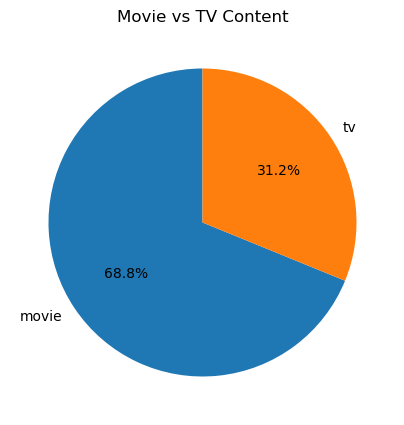

In [57]:
### 1. type (영화/TV 비율)
type_counts = df['type'].value_counts()
plt.figure(figsize=(5,5))
type_counts.plot.pie(autopct='%1.1f%%', startangle=90)
plt.title('Movie vs TV Content')
plt.ylabel('')
plt.show()

## 개봉연도 분포

In [58]:
### 2. release_date (개봉 연도 분포)
# df['release_year'] = pd.to_datetime(df['release_date'], errors='coerce').dt.year
# plt.figure(figsize=(10,5))
# sns.histplot(df['release_year'].dropna(), bins=20, kde=False)
# plt.title('Distribution of Release Year')
# plt.xlabel('Release Year')
# plt.ylabel('Count')
# plt.show()

## 상영시간 분포

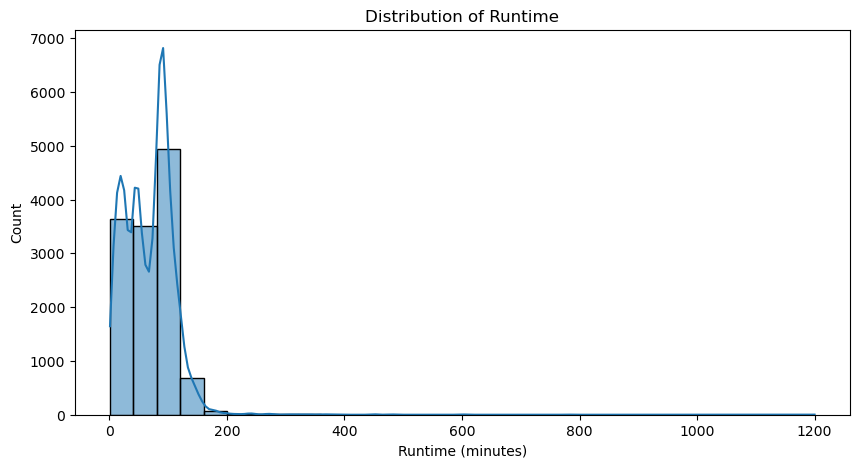

In [59]:
### 3. runtime (상영시간 분포)
plt.figure(figsize=(10,5))
sns.histplot(df['runtime'].dropna(), bins=30, kde=True)
plt.title('Distribution of Runtime')
plt.xlabel('Runtime (minutes)')
plt.ylabel('Count')
plt.show()

## 장르분포

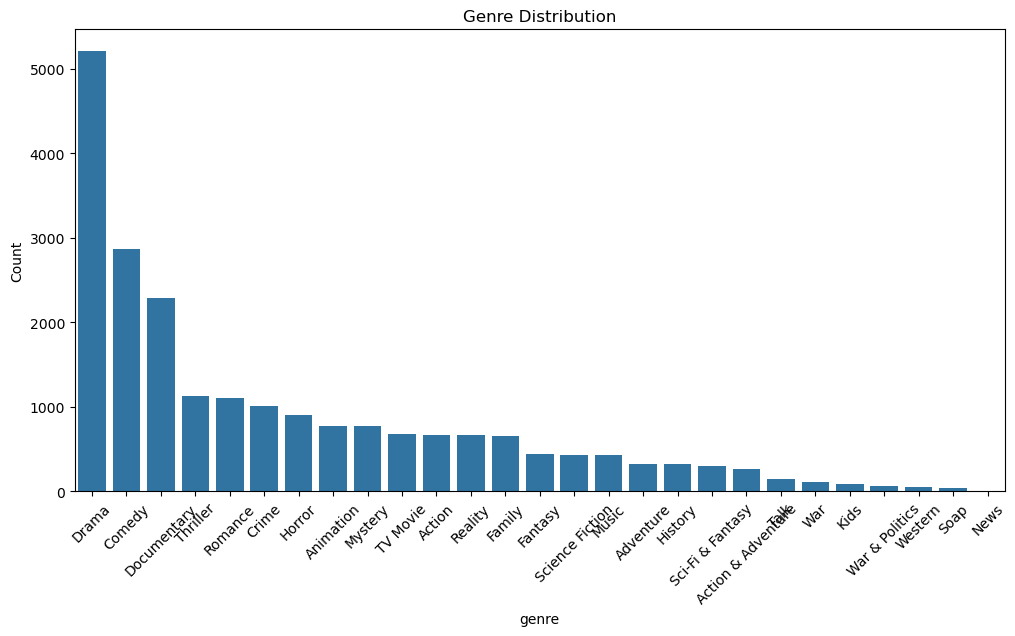

In [60]:
genre_series = df['genre'].dropna().str.split(', ')
genre_list = genre_series.explode()
genre_counts = genre_list.value_counts()
plt.figure(figsize=(12,6))
sns.barplot(x=genre_counts.index, y=genre_counts.values)
plt.title('Genre Distribution')
plt.xticks(rotation=45)
plt.ylabel('Count')
plt.show()

## country 분포

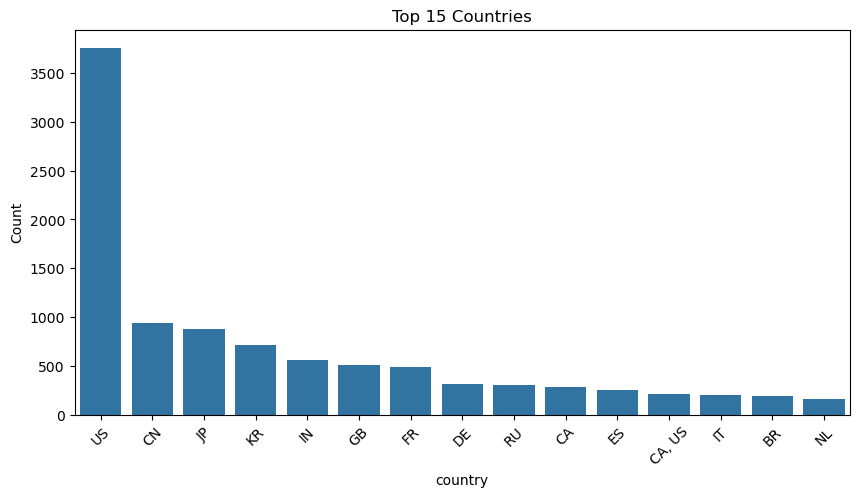

In [61]:
country_counts = df['country'].value_counts().head(15)
plt.figure(figsize=(10,5))
sns.barplot(x=country_counts.index, y=country_counts.values)
plt.title('Top 15 Countries')
plt.xticks(rotation=45)
plt.ylabel('Count')
plt.show()

## language 분포

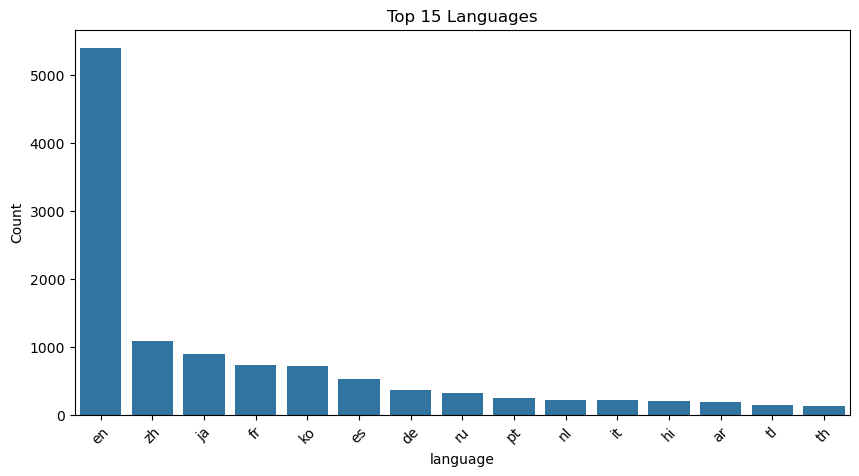

In [62]:
language_counts = df['language'].value_counts().head(15)
plt.figure(figsize=(10,5))
sns.barplot(x=language_counts.index, y=language_counts.values)
plt.title('Top 15 Languages')
plt.xticks(rotation=45)
plt.ylabel('Count')
plt.show()

## imdb rating 분포

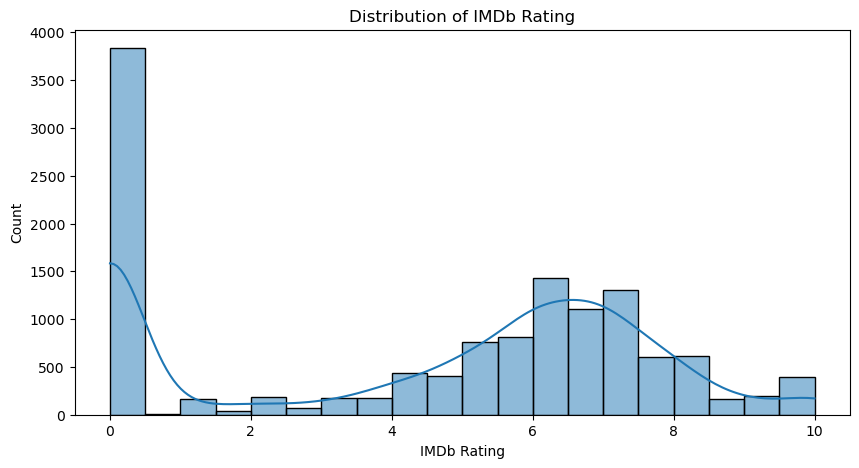

In [63]:
plt.figure(figsize=(10,5))
sns.histplot(df['imdb_rating'].dropna(), bins=20, kde=True)
plt.title('Distribution of IMDb Rating')
plt.xlabel('IMDb Rating')
plt.ylabel('Count')
plt.show()

## imdb_rating vs imdb_review_count

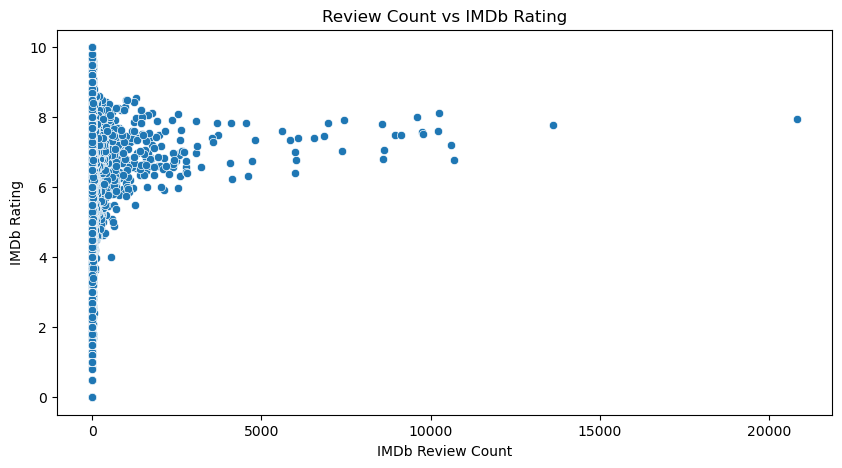

In [64]:
plt.figure(figsize=(10,5))
sns.scatterplot(x='imdb_review_count', y='imdb_rating', data=df)
plt.title('Review Count vs IMDb Rating')
plt.xlabel('IMDb Review Count')
plt.ylabel('IMDb Rating')
plt.show()

## runtime vs imdb_rating

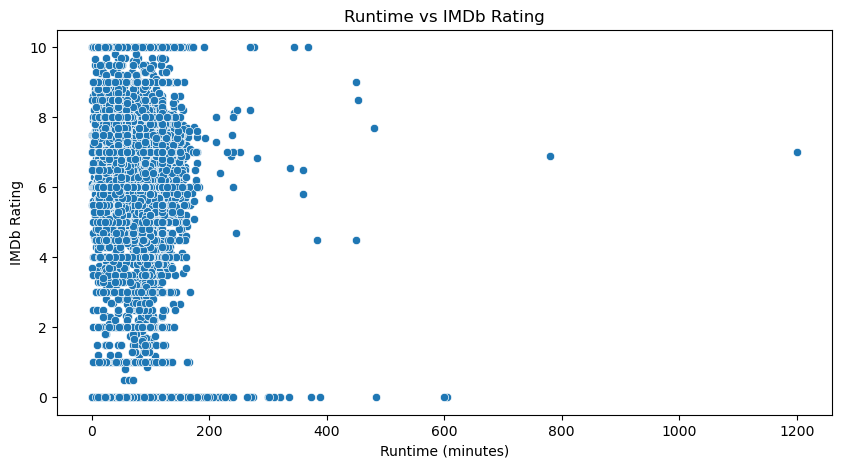

In [65]:
plt.figure(figsize=(10,5))
sns.scatterplot(x='runtime', y='imdb_rating', data=df)
plt.title('Runtime vs IMDb Rating')
plt.xlabel('Runtime (minutes)')
plt.ylabel('IMDb Rating')
plt.show()

## 장르별 평점

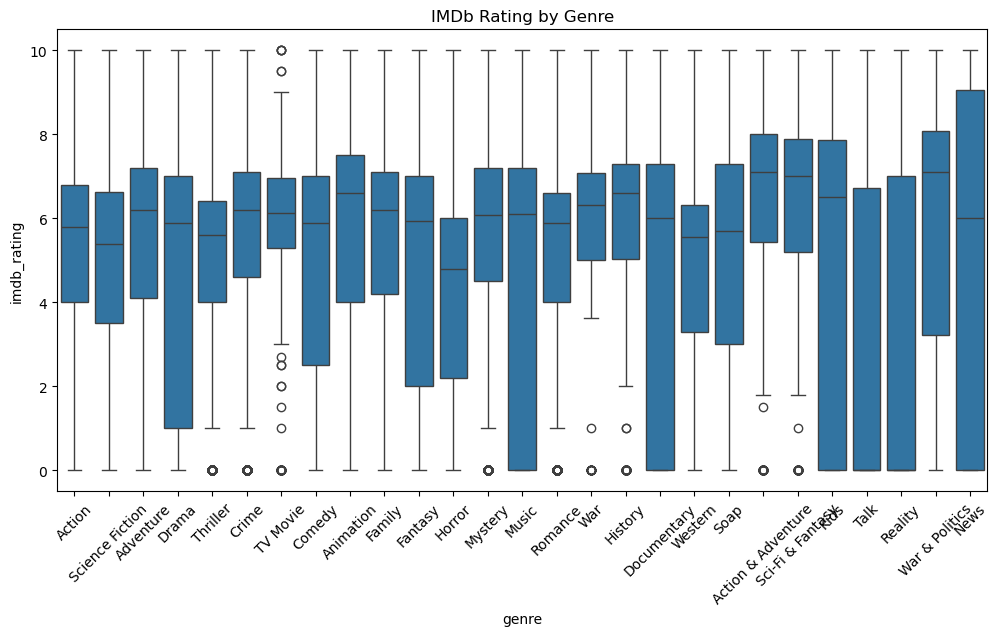

In [66]:
genre_rating = pd.concat([genre_series, df['imdb_rating']], axis=1).explode('genre')
genre_rating = genre_rating.dropna()
plt.figure(figsize=(12,6))
sns.boxplot(x='genre', y='imdb_rating', data=genre_rating)
plt.title('IMDb Rating by Genre')
plt.xticks(rotation=45)
plt.show()

## 나라별 장르 분포도

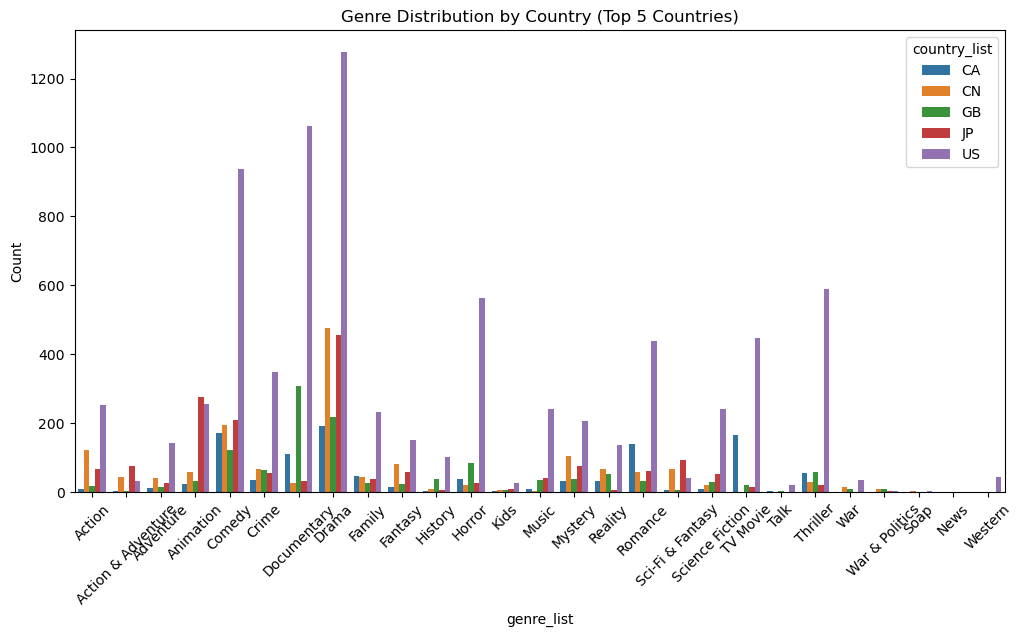

In [67]:
df_country_genre = df.copy()
df_country_genre['country_list'] = df_country_genre['country'].str.split(', ')
df_country_genre = df_country_genre.explode('country_list')
df_country_genre['genre_list'] = df_country_genre['genre'].str.split(', ')
df_country_genre = df_country_genre.explode('genre_list')

country_genre_counts = df_country_genre.groupby(['country_list', 'genre_list']).size().reset_index(name='count')
top_countries = df_country_genre['country_list'].value_counts().head(5).index
filtered = country_genre_counts[country_genre_counts['country_list'].isin(top_countries)]

plt.figure(figsize=(12, 6))
sns.barplot(x='genre_list', y='count', hue='country_list', data=filtered)
plt.title('Genre Distribution by Country (Top 5 Countries)')
plt.xticks(rotation=45)
plt.ylabel('Count')
plt.show()

## 평점 신뢰도 분석, 감독별 평균 평점

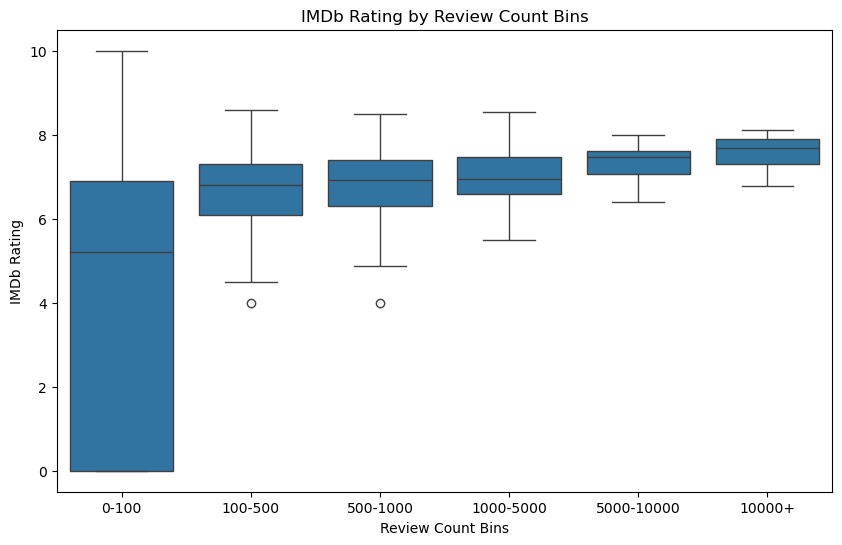

/var/folders/gd/kdlq8js55wdg60tg67427vvc0000gn/T/ipykernel_9854/2791718114.py:18: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='mean', y='director', data=director_top, palette='viridis')


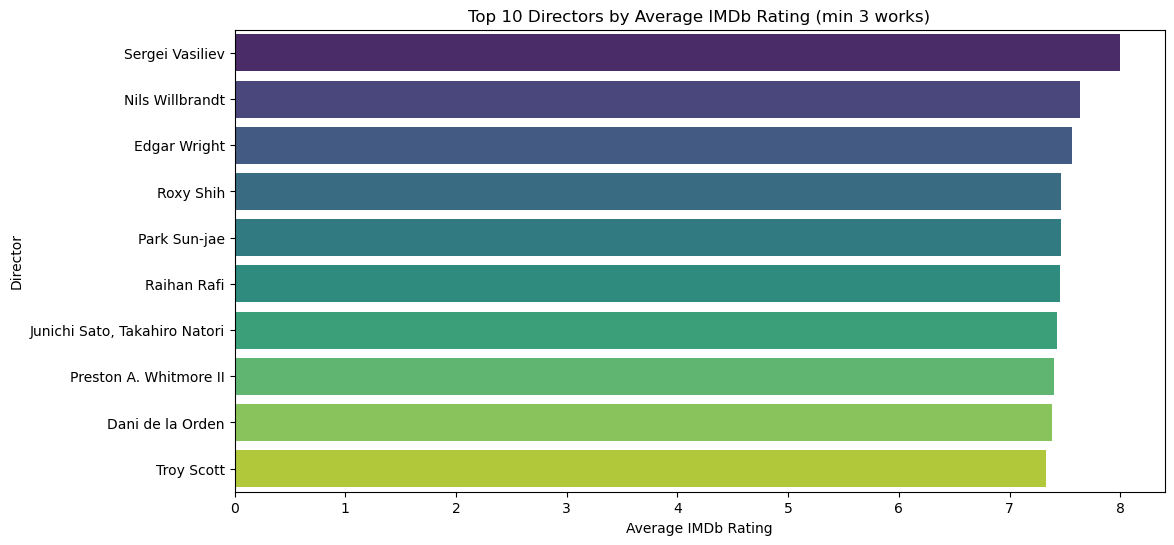

In [68]:
bins = [0, 100, 500, 1000, 5000, 10000, 50000]
labels = ['0-100', '100-500', '500-1000', '1000-5000', '5000-10000', '10000+']
df['review_bin'] = pd.cut(df['imdb_review_count'], bins=bins, labels=labels, right=False)

plt.figure(figsize=(10,6))
sns.boxplot(x='review_bin', y='imdb_rating', data=df)
plt.title('IMDb Rating by Review Count Bins')
plt.xlabel('Review Count Bins')
plt.ylabel('IMDb Rating')
plt.show()

### 추가 심화 분석 ③ 감독별 평균 평점
# 감독 집계
director_avg = df.groupby('director')['imdb_rating'].agg(['count', 'mean']).reset_index()
director_top = director_avg[director_avg['count'] >= 3].sort_values(by='mean', ascending=False).head(10)

plt.figure(figsize=(12,6))
sns.barplot(x='mean', y='director', data=director_top, palette='viridis')
plt.title('Top 10 Directors by Average IMDb Rating (min 3 works)')
plt.xlabel('Average IMDb Rating')
plt.ylabel('Director')
plt.show()

## 배우별 평균 평점(작품 3개이상인 배우)

/var/folders/gd/kdlq8js55wdg60tg67427vvc0000gn/T/ipykernel_9854/3351837532.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='mean', y='cast_list', data=cast_top, palette='plasma')


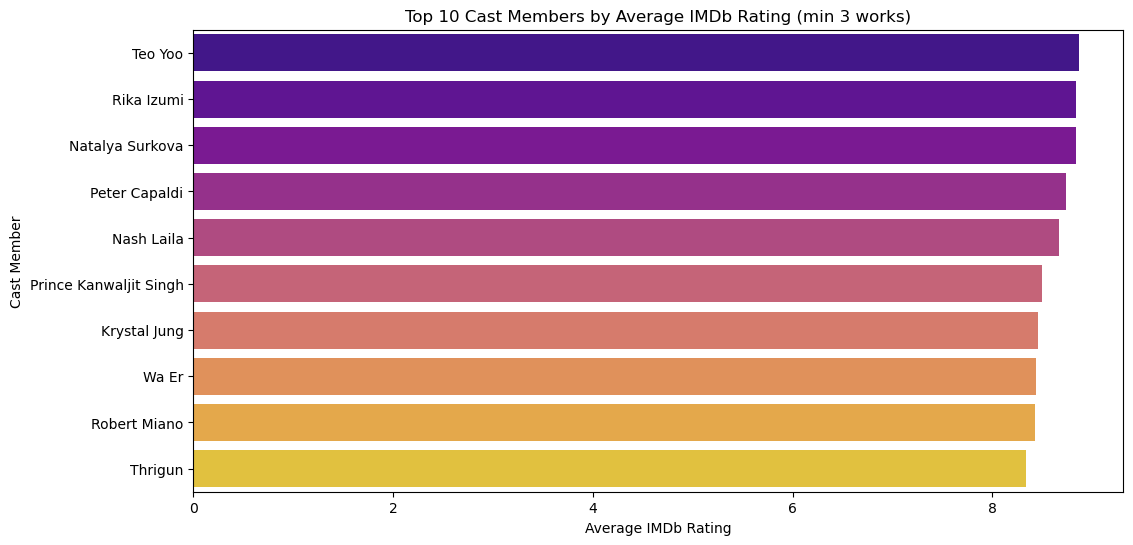

In [69]:
df['cast_list'] = df['cast'].str.split(', ')
df_cast = df.explode('cast_list')

cast_avg = df_cast.groupby('cast_list')['imdb_rating'].agg(['count', 'mean']).reset_index()
cast_top = cast_avg[cast_avg['count'] >= 3].sort_values(by='mean', ascending=False).head(10)

plt.figure(figsize=(12,6))
sns.barplot(x='mean', y='cast_list', data=cast_top, palette='plasma')
plt.title('Top 10 Cast Members by Average IMDb Rating (min 3 works)')
plt.xlabel('Average IMDb Rating')
plt.ylabel('Cast Member')
plt.show()

## 개봉 (월) 분석

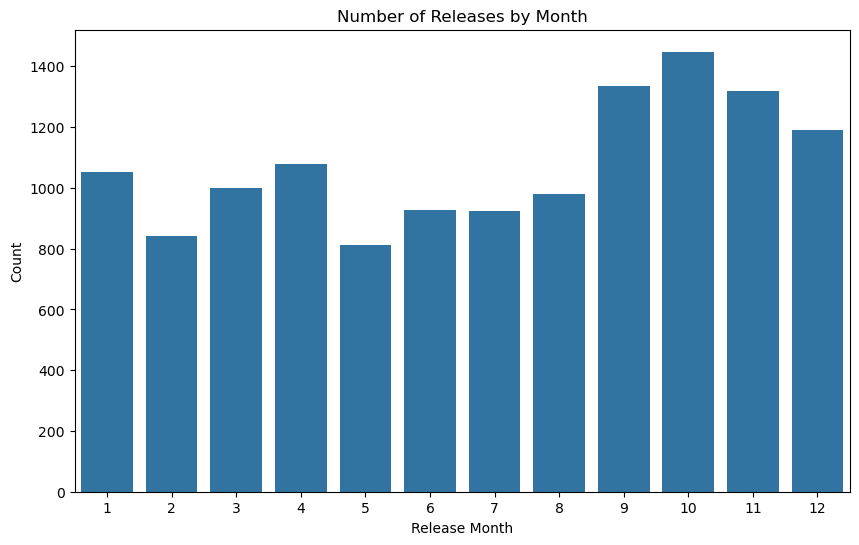

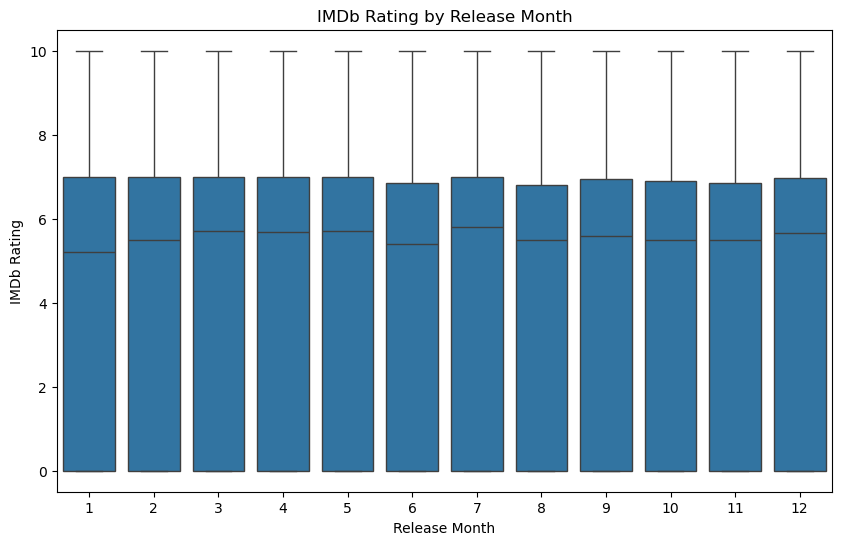

In [70]:
### 추가 심화 분석 ⑤ 개봉 월(month) 분석
df['release_month'] = pd.to_datetime(df['release_date'], errors='coerce').dt.month

plt.figure(figsize=(10,6))
sns.countplot(x='release_month', data=df)
plt.title('Number of Releases by Month')
plt.xlabel('Release Month')
plt.ylabel('Count')
plt.show()

plt.figure(figsize=(10,6))
sns.boxplot(x='release_month', y='imdb_rating', data=df)
plt.title('IMDb Rating by Release Month')
plt.xlabel('Release Month')
plt.ylabel('IMDb Rating')
plt.show()